# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

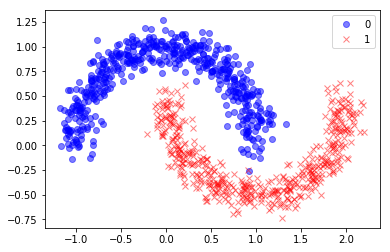

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [10]:
results

[0.31764749189217883, 0.8433333]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


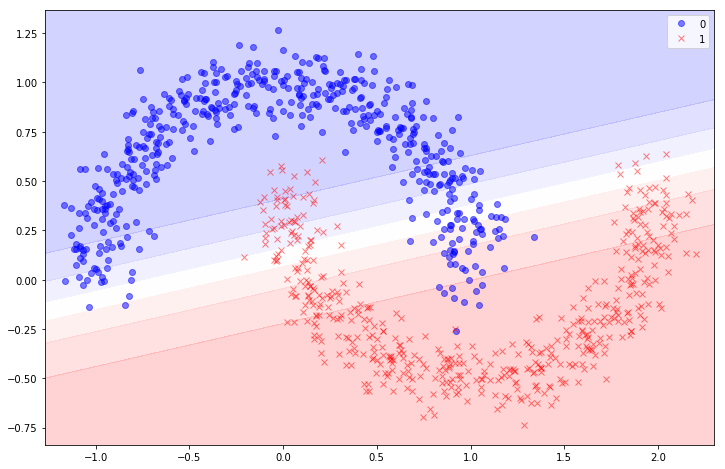

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Train on 700 samples
Epoch 1/200
700/700 [==============================] - 0s 644us/sample - loss: 0.4989 - accuracy: 0.8343
Epoch 2/200
700/700 [==============================] - 0s 38us/sample - loss: 0.3132 - accuracy: 0.8929
Epoch 3/200
700/700 [==============================] - 0s 38us/sample - loss: 0.2490 - accuracy: 0.9014
Epoch 4/200
700/700 [==============================] - 0s 38us/sample - loss: 0.2252 - accuracy: 0.9043
Epoch 5/200
700/700 [==============================] - 0s 42us/sample - loss: 0.2162 - accuracy: 0.9086
Epoch 6/200
700/700 [==============================] - 0s 46us/sample - loss: 0.2109 - accuracy: 0.9043
Epoch 7/200
700/700 [==============================] - 0s 40us/sample - loss: 0.2107 - accuracy: 0.9086
Epoch 8/200
700/700 [==============================] - 0s 39us/sample - loss: 0.2015 - accuracy: 0.9071
Epoch 9/200
700/700 [==============================] - 0s 37us/sample - loss: 0.2302 - accuracy: 0.8829
Epoch 10/200
700/700 [====================

700/700 [==============================] - 0s 36us/sample - loss: 0.1893 - accuracy: 0.9100
Epoch 79/200
700/700 [==============================] - 0s 36us/sample - loss: 0.1961 - accuracy: 0.9000
Epoch 80/200
700/700 [==============================] - 0s 32us/sample - loss: 0.2016 - accuracy: 0.8957
Epoch 81/200
700/700 [==============================] - 0s 39us/sample - loss: 0.1889 - accuracy: 0.9071
Epoch 82/200
700/700 [==============================] - 0s 38us/sample - loss: 0.1983 - accuracy: 0.9071
Epoch 83/200
700/700 [==============================] - 0s 39us/sample - loss: 0.1905 - accuracy: 0.9129
Epoch 84/200
700/700 [==============================] - 0s 34us/sample - loss: 0.1904 - accuracy: 0.9057
Epoch 85/200
700/700 [==============================] - 0s 34us/sample - loss: 0.1931 - accuracy: 0.9114
Epoch 86/200
700/700 [==============================] - 0s 34us/sample - loss: 0.1917 - accuracy: 0.9100
Epoch 87/200
700/700 [==============================] - 0s 34us/samp

700/700 [==============================] - 0s 35us/sample - loss: 0.1915 - accuracy: 0.9071
Epoch 156/200
700/700 [==============================] - 0s 34us/sample - loss: 0.1981 - accuracy: 0.9014
Epoch 157/200
700/700 [==============================] - 0s 33us/sample - loss: 0.1963 - accuracy: 0.9057
Epoch 158/200
700/700 [==============================] - 0s 40us/sample - loss: 0.1909 - accuracy: 0.9057
Epoch 159/200
700/700 [==============================] - 0s 38us/sample - loss: 0.1964 - accuracy: 0.8971
Epoch 160/200
700/700 [==============================] - 0s 38us/sample - loss: 0.1886 - accuracy: 0.9043
Epoch 161/200
700/700 [==============================] - 0s 38us/sample - loss: 0.1857 - accuracy: 0.9114
Epoch 162/200
700/700 [==============================] - 0s 38us/sample - loss: 0.1993 - accuracy: 0.8957
Epoch 163/200
700/700 [==============================] - 0s 40us/sample - loss: 0.1770 - accuracy: 0.9157
Epoch 164/200
700/700 [==============================] - 0s 

In [16]:
model.evaluate(X_test, y_test, verbose=0)

[0.02765585946540038, 0.99333334]

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.993


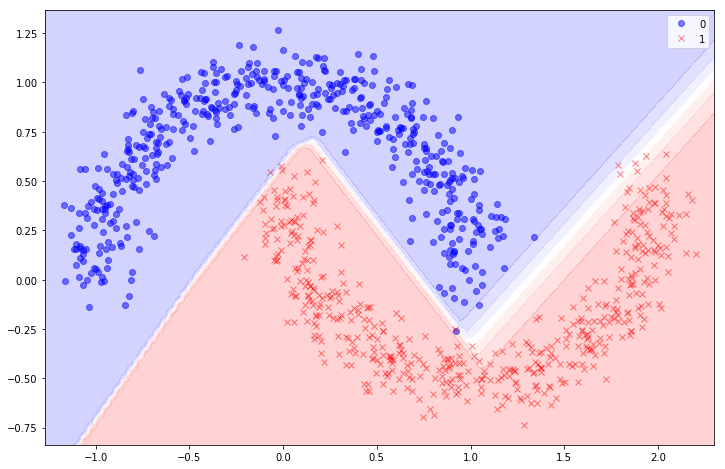

In [19]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [20]:
df = pd.read_csv('../data/iris.csv')

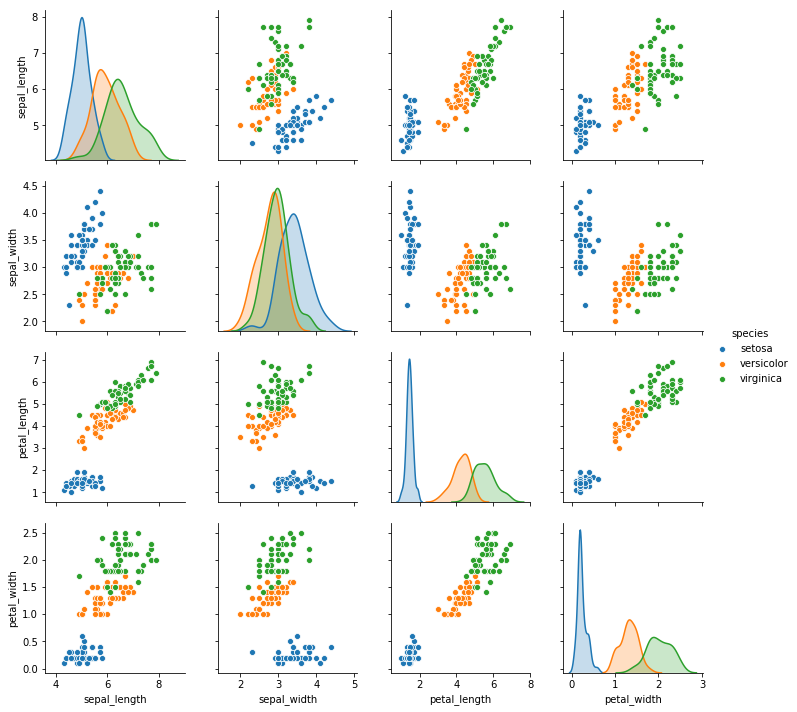

In [21]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [26]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_cat = to_categorical(y)

In [31]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [44]:
model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/100
108/108 [==============================] - 0s 4ms/sample - loss: 4.4614 - accuracy: 0.3704 - val_loss: 5.5095 - val_accuracy: 0.1667
Epoch 2/100
108/108 [==============================] - 0s 118us/sample - loss: 3.7523 - accuracy: 0.2963 - val_loss: 4.5492 - val_accuracy: 0.0000e+00
Epoch 3/100
108/108 [==============================] - 0s 137us/sample - loss: 3.1735 - accuracy: 0.0000e+00 - val_loss: 3.7392 - val_accuracy: 0.0833
Epoch 4/100
108/108 [==============================] - 0s 131us/sample - loss: 2.6820 - accuracy: 0.1852 - val_loss: 3.0346 - val_accuracy: 0.3333
Epoch 5/100
108/108 [==============================] - 0s 152us/sample - loss: 2.2909 - accuracy: 0.2963 - val_loss: 2.4040 - val_accuracy: 0.3333
Epoch 6/100
108/108 [==============================] - 0s 143us/sample - loss: 1.9552 - accuracy: 0.2963 - val_loss: 1.8770 - val_accuracy: 0.3333
Epoch 7/100
108/108 [==============================] - 0s 147us/sam

108/108 [==============================] - 0s 186us/sample - loss: 0.5061 - accuracy: 0.7037 - val_loss: 0.5282 - val_accuracy: 0.6667
Epoch 57/100
108/108 [==============================] - 0s 177us/sample - loss: 0.5023 - accuracy: 0.7130 - val_loss: 0.5294 - val_accuracy: 0.7500
Epoch 58/100
108/108 [==============================] - 0s 170us/sample - loss: 0.4972 - accuracy: 0.7222 - val_loss: 0.5274 - val_accuracy: 0.7500
Epoch 59/100
108/108 [==============================] - 0s 157us/sample - loss: 0.4930 - accuracy: 0.7315 - val_loss: 0.5260 - val_accuracy: 0.7500
Epoch 60/100
108/108 [==============================] - 0s 135us/sample - loss: 0.4890 - accuracy: 0.7407 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 61/100
108/108 [==============================] - 0s 123us/sample - loss: 0.4850 - accuracy: 0.7315 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 62/100
108/108 [==============================] - 0s 131us/sample - loss: 0.4806 - accuracy: 0.7315 - val_loss: 0.5106 

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred[:5]

array([[0.04109217, 0.7652839 , 0.19362397],
       [0.00491474, 0.4886996 , 0.5063857 ],
       [0.00369722, 0.49865827, 0.49764448],
       [0.0666503 , 0.7838786 , 0.14947115],
       [0.02364813, 0.6737349 , 0.3026169 ]], dtype=float32)

In [39]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.83      0.87        12
           2       0.82      0.90      0.86        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [42]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  1,  9]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [43]:
pima_data = pd.read_csv("../data/diabetes.csv")
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


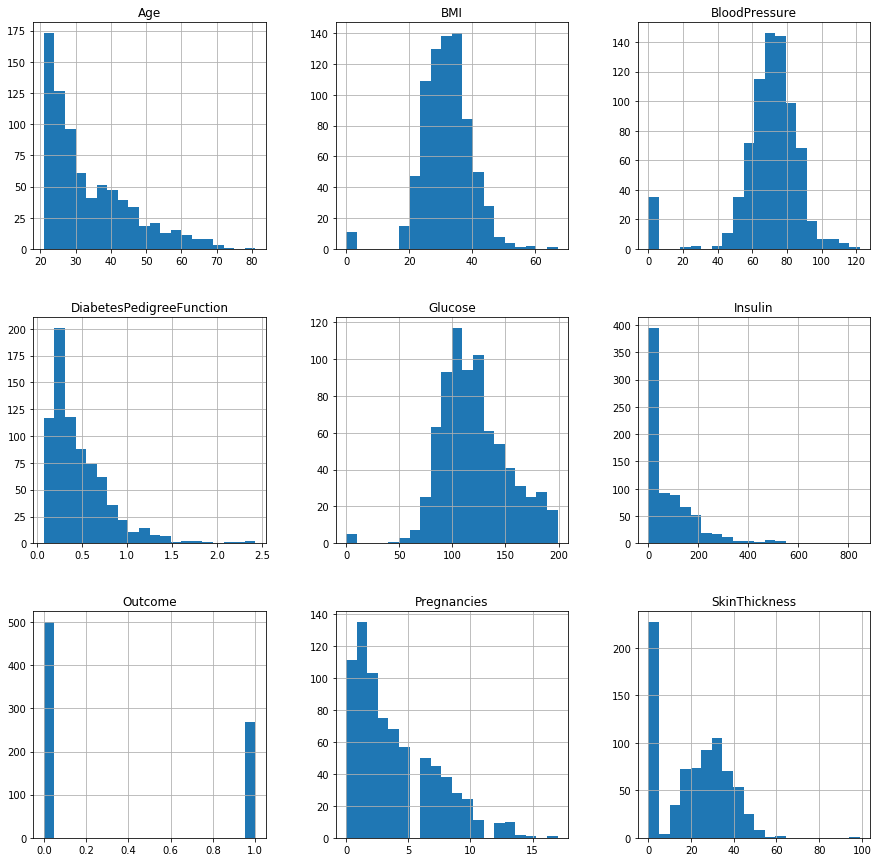

In [55]:
hists = pima_data.hist(figsize=(15,15), bins=20)

/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


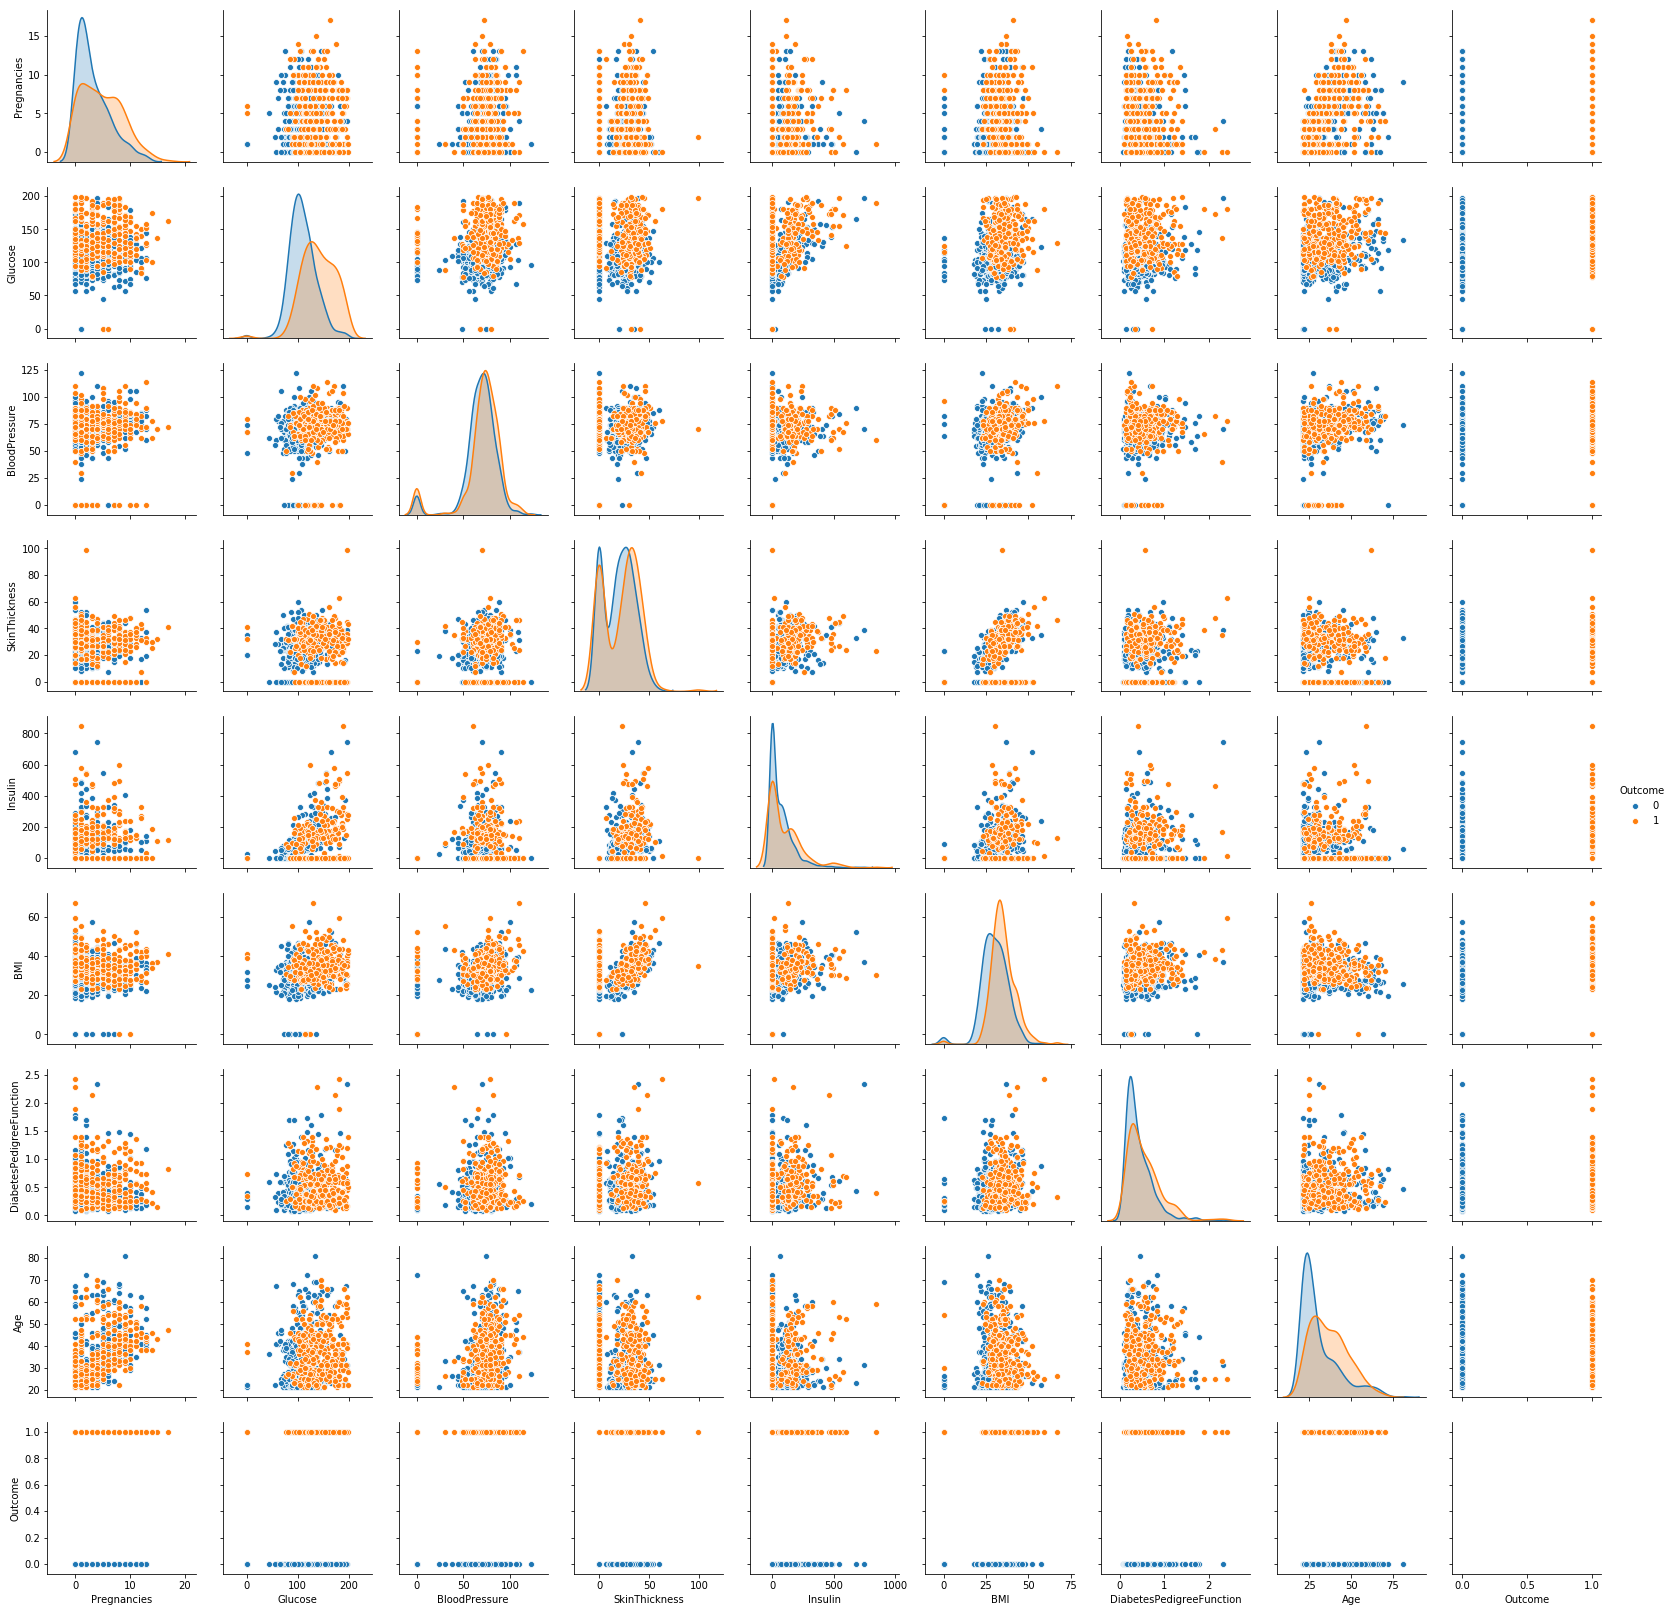

In [39]:
sns.pairplot(pima_data, hue="Outcome")

In [40]:
pima_data.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [41]:
"baseline accuarcy: {}".format(500/768)

'baseline accuarcy: 0.6510416666666666'

In [65]:
# preprocessing the input: normalize the input
# pima_data["Glucose_norm"] = pima_data["Glucose"]/100
# pima_data["BloodPressure_norm"] = pima_data["BloodPressure"]/100
# pima_data["SkinThickness_norm"] = pima_data["SkinThickness"]/100
# pima_data["Insulin_norm"] = pima_data["Insulin"]/100
# pima_data["BMI_norm"] = pima_data["BMI"]/100
# pima_data["Age_norm"] = pima_data["Age"]/100
# pima_data

training_data = pima_data.drop(["Outcome"], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data)

pima_scaled = scaler.transform(training_data)

pd.DataFrame.from_records(pima_scaled).describe()

/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [68]:
X = pima_scaled
y = pima_data[["Outcome"]].to_numpy()

In [69]:
# features = ["Pregnancies", 
#             "Glucose_norm", 
#             "BloodPressure_norm", 
#             "SkinThickness_norm", 
#             "Insulin_norm", 
#             "BMI_norm", 
#             "Age_norm", 
#             "DiabetesPedigreeFunction"]

# X = pima_data[features]
# y = pima_data[["Outcome"]]
# X.count()

In [70]:
# from tensorflow.keras import regularizers

# classifier = Sequential()
# classifier.add(Dense(100, input_shape = (8,), activation="relu",
#                     kernel_regularizer=regularizers.l1(0.0), activity_regularizer=regularizers.l1(0.0)))
# classifier.add(Dense(100, activation="relu",
#                      kernel_regularizer=regularizers.l1(0.0), activity_regularizer=regularizers.l1(0.0)))
# classifier.add(Dense(1, activation="sigmoid",
#                      kernel_regularizer=regularizers.l1(0.0), activity_regularizer=regularizers.l1(0.0)))
# classifier.compile(Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])
# classifier.summary()

In [71]:
# # simple early stopping
# es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# classifier.fit(X, y, epochs=100, validation_split=0.2, callbacks=[es], batch_size=50)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [79]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(20, input_shape=(8,), activation="relu", activity_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.compile(Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

# the number of parameters in batch_normalization
# https://stackoverflow.com/questions/42521005/how-the-number-of-parameters-associated-with-batchnormalization-layer-is-2048

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [80]:
# es = EarlyStopping(monitor="val_loss")
model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=100)

Train on 552 samples, validate on 62 samples
Epoch 1/100
552/552 [==============================] - 1s 2ms/sample - loss: 0.7631 - accuracy: 0.5743 - val_loss: 0.7587 - val_accuracy: 0.6129
Epoch 2/100
552/552 [==============================] - 0s 51us/sample - loss: 0.7397 - accuracy: 0.6087 - val_loss: 0.7365 - val_accuracy: 0.6290
Epoch 3/100
552/552 [==============================] - 0s 66us/sample - loss: 0.7199 - accuracy: 0.6395 - val_loss: 0.7169 - val_accuracy: 0.6452
Epoch 4/100
552/552 [==============================] - 0s 68us/sample - loss: 0.7017 - accuracy: 0.6594 - val_loss: 0.6997 - val_accuracy: 0.6452
Epoch 5/100
552/552 [==============================] - 0s 76us/sample - loss: 0.6849 - accuracy: 0.6848 - val_loss: 0.6853 - val_accuracy: 0.7097
Epoch 6/100
552/552 [==============================] - 0s 75us/sample - loss: 0.6711 - accuracy: 0.6920 - val_loss: 0.6724 - val_accuracy: 0.7097
Epoch 7/100
552/552 [==============================] - 0s 51us/sample - loss: 0.

In [83]:
y_preds = model.predict(x_test) > 0.5

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

print("test accuracy: {}".format(accuracy_score(y_pred=y_preds, y_true=y_test)))
print("test accuracy: {}".format(precision_score(y_pred=y_preds, y_true=y_test)))
print("test accuracy: \n{}".format(confusion_matrix(y_pred=y_preds, y_true=y_test)))

test accuracy: 0.7402597402597403
test accuracy: 0.7058823529411765
test accuracy: 
[[90 10]
 [30 24]]


## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. get the data.
# 2. understanding the problem, classification or regression? 
# 3. prepare the data: fill missing value, normalized or standardize, 2random_split, 
# 4. choose the model and understand its hyper parameters
# 5. use grid search + cross valiation for tuning the model
# 6. evaluate the performance on test dataset.

def preprocess(raw_X):
    # Scaled data has zero mean and unit variance:
    X = preprocessing.scale(raw_X)
    return X


data = pd.read_csv("../data/diabetes.csv")

x = data.drop(["Outcome"], axis=1)
x = pd.DataFrame.from_records(preprocess(x))
y = data[['Outcome']]
print(x.shape)
print(y.shape)
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

print(x_train.shape)
print(y_train.shape)

rf_clf = RandomForestClassifier()

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [5, 20, 50, 100], 
                    'max_depth': [3, 5, 7, 9],
                    'min_samples_split': [2, 5, 10, 20],
                    "max_features":[3,7]}]

scores = ['accuracy']

np.random.seed(44)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(rf_clf, tuned_parameters, cv=10,
                       scoring='%s' % score)
    clf.fit(x_train, y_train.unstack())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


(768, 8)
(768, 1)
(614, 8)
(614, 1)
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 20}

Grid scores on development set:

0.770 (+/-0.074) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 5}
0.774 (+/-0.101) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 20}
0.757 (+/-0.091) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 50}
0.769 (+/-0.112) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}
0.767 (+/-0.089) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 5}
0.764 (+/-0.071) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 20}
0.774 (+/-0.098) for {'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 50}
0.772 (+/-0.093) for {'max_depth': 3, 'max_features': 3, 

/Users/zhenxing/Envs/py3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
print(clf.best_params_)
best_model = clf.best_estimator_

y_test_preds = best_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test, y_test_preds))
print("accuracy: {}".format(accuracy_score(y_pred=y_test_preds, y_true=y_test)))
print(precision_score(y_pred=y_test_preds, y_true=y_test))

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 20}
[[91  9]
 [32 22]]
accuracy: 0.7337662337662337
0.7096774193548387


In [95]:
# Keras Cross-val
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# fix random seed for reproducibility


kfold=10
cvscores = []
for i in range(10):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    es = EarlyStopping(monitor="val_loss")
    # Fit the model
    history= model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=5, verbose=0, callbacks=[es])
    # evaluate the model
    print("%s: %.2f%%" % ("val_accuracy", history.history["val_accuracy"][-1]))
    cvscores.append(history.history["val_accuracy"] * 100)

print("Keras: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

val_accuracy: 0.73%
val_accuracy: 0.71%
val_accuracy: 0.74%
val_accuracy: 0.65%
val_accuracy: 0.74%
val_accuracy: 0.68%
val_accuracy: 0.77%
val_accuracy: 0.69%
val_accuracy: 0.66%
val_accuracy: 0.66%


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [96]:
best_model = model

y_test_preds = best_model.predict(x_test) > 0.5

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test, y_test_preds))
print("accuracy: {}".format(accuracy_score(y_pred=y_test_preds, y_true=y_test)))
print(precision_score(y_pred=y_test_preds, y_true=y_test))

[[84 16]
 [34 20]]
accuracy: 0.6753246753246753
0.5555555555555556


## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.


<h1>Questions:</h1>

How to reproduce the same model in deep learning?
https://machinelearningmastery.com/reproducible-results-neural-networks-keras/